# Regression Model
Here is the data. which is about Oil price & its details in Brazils FOR 15 years.
We need to read the data, make data processing, then Make a model to predict the (mean Price) depend on other features

# Data Loading 
so we need first to import needed libraries


In [1]:
# importation de library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor



And since the feature written in portugaise, i translated it to english so we can understand them.

In [2]:
col_names = ['Index','Initial Date','Final Date','Region','State','Product','Number of searches','Unit of Measurment',
           'Mean Price','Default Price','Minimum Price','Maximum Price','Mean Margin','Price Standar Deviation','Mean Price Distribution',
           'Default Price Distribution','Minimum Price Distribution','Maximum Price Distribution','Distribution Standard Deviation',
           'M Factor' ,'Year']
data = pd.read_excel('2004-2019.xls', names=col_names)


In [3]:
data.head()

,Index,Initial Date,Final Date,Region,State,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,...,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
# Shape of data
data.shape


(65534, 21)

In [ ]:
# Since the index will do nothing in the data lets drop it
data.drop(['Index'], axis = 1, inplace = True)



# DATA Processing
now we need to know more about data, lets use describe tool.


In [5]:
data.describe()

,Index,Number of searches,Mean Price,Default Price,Minimum Price,Maximum Price,Price Standar Deviation,M Factor,Year
count,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000
mean,32767.499542,276.064302,9.419979,0.500583,8.258743,10.728551,0.044842,6.509613,2008.929243
std,18918.181400,459.770339,14.292417,0.884875,12.383575,16.388597,0.024480,3.474459,2.925159
min,0.000000,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,16384.250000,55.000000,1.863000,0.063000,1.740000,2.100000,0.029000,3.000000,2006.000000
50%,32767.500000,119.000000,2.288000,0.099000,2.110000,2.580000,0.041000,7.000000,2009.000000
75%,49150.750000,292.000000,2.852000,0.171000,2.689000,3.190000,0.059000,10.000000,2012.000000
max,65534.000000,4167.000000,52.949000,7.042000,47.000000,70.000000,0.395000,12.000000,2014.000000


it's clear that python will not calculate categorical data, only numerical values, also it looks we need to standrardize the numbers, but this will be done later.
now lets check the types of features & to check if it contain nulls.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Index                            65534 non-null  int64         
 1   Initial Date                     65534 non-null  datetime64[ns]
 2   Final Date                       65534 non-null  datetime64[ns]
 3   Region                           65534 non-null  object        
 4   State                            65534 non-null  object        
 5   Product                          65534 non-null  object        
 6   Number of searches               65534 non-null  int64         
 7   Unit of Measurment               65534 non-null  object        
 8   Mean Price                       65534 non-null  float64       
 9   Default Price                    65534 non-null  float64       
 10  Minimum Price                    65534 non-null  float64  

In [14]:
data['Mean Margin'].count()

65534

In [15]:
data['Mean Margin'].shape

(65534,)

In [16]:
n = 0 
for i in range(data.shape[0]) :
    if str(data['Mean Margin'][i]) == '-':
        n+=1
print('There is {} null value here'.format(n))

There is 1493 null value here


In [19]:
summ = 0
n = 0

for i in range(data.shape[0]) : 
    if not str(data['Mean Margin'][i]) == '-' : 
        summ += float(data['Mean Margin'][i])
        n+=1

the_mean = summ/ n

print('the mean is {}'.format(the_mean))

for i in range(data.shape[0]) : 
    if str(data['Mean Margin'][i]) == '-' : 
      data['Mean Margin'][i] = the_mean
        

the mean is 1.7522229353070486


In [20]:
# Lets check if there is any nulls exists :
n = 0
for i in range(data.shape[0]):
    if str(data['Mean Margin'][i]) == '-':
        n +=1

print('There is {} null value here'.format(n))

There is 0 null value here


In [21]:
# Great now lets check if it become 'Float64' or not 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Index                            65534 non-null  int64         
 1   Initial Date                     65534 non-null  datetime64[ns]
 2   Final Date                       65534 non-null  datetime64[ns]
 3   Region                           65534 non-null  object        
 4   State                            65534 non-null  object        
 5   Product                          65534 non-null  object        
 6   Number of searches               65534 non-null  int64         
 7   Unit of Measurment               65534 non-null  object        
 8   Mean Price                       65534 non-null  float64       
 9   Default Price                    65534 non-null  float64       
 10  Minimum Price                    65534 non-null  float64  

In [22]:
# it's still written here as object, lets check if any cell contain non-nubers here
n = 0
for i in range(data.shape[0]) : 
    if float(data['Mean Margin'][i]) == 0 : 
        n+=1

print('There is {} cell with zero value'.format(n))

There is 0 cell with zero value


In [23]:
# Great, now lets repeat the same step in other non categorical features which written as Object, like :
a = b = c= d = e  = 0
for i in range(data.shape[0]) : 
    if str(data['Mean Price Distribution'][i]) == '-' : 
        a+=1
    if str(data['Default Price Distribution'][i]) == '-' : 
        b+=1
    if str(data['Minimum Price Distribution'][i]) == '-' : 
        c+=1
    if str(data['Maximum Price Distribution'][i]) == '-' : 
        d+=1
    if str(data['Distribution Standard Deviation'][i]) == '-' :  
        e+=1

print('There is {} null value here'.format(a))
print('There is {} null value here'.format(b))
print('There is {} null value here'.format(c))                
print('There is {} null value here'.format(d))
print('There is {} null value here'.format(e))   

There is 1471 null value here
There is 1471 null value here
There is 1471 null value here
There is 1471 null value here
There is 1471 null value here


In [24]:
# Then lets make the mean in those cells in the same way (this might take few mins)
a_summ = b_summ = c_summ = d_summ = e_summ = 0
n = 1471

for i in range(data.shape[0]) : 
    if not str(data['Mean Price Distribution'][i]) == '-' : 
        a_summ += float(data['Mean Price Distribution'][i])
        
    if not str(data['Default Price Distribution'][i]) == '-' : 
        b_summ += float(data['Default Price Distribution'][i])

    if not str(data['Minimum Price Distribution'][i]) == '-' : 
        c_summ += float(data['Minimum Price Distribution'][i])
        
    if not str(data['Maximum Price Distribution'][i]) == '-' : 
        d_summ += float(data['Maximum Price Distribution'][i])
        
    if not str(data['Distribution Standard Deviation'][i]) == '-' : 
        e_summ += float(data['Distribution Standard Deviation'][i])
        

      
        
a_mean = a_summ/ n
b_mean = b_summ/ n
c_mean = c_summ/ n
d_mean = d_summ/ n
e_mean = e_summ/ n

for i in range(data.shape[0]) : 
    if str(data['Mean Price Distribution'][i]) == '-' : 
        data['Mean Price Distribution'][i] = a_mean

    if str(data['Default Price Distribution'][i]) == '-' : 
        data['Default Price Distribution'][i] = b_mean
        
    if str(data['Minimum Price Distribution'][i]) == '-' : 
        data['Minimum Price Distribution'][i] = c_mean
        
    if str(data['Maximum Price Distribution'][i]) == '-' : 
        data['Maximum Price Distribution'][i] = d_mean
    
    if str(data['Distribution Standard Deviation'][i]) == '-' : 
        data['Distribution Standard Deviation'][i] = e_mean
        

C:\Users\zolboy\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\zolboy\anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\zolboy\anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\zolboy\anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A 

# Categorical Features 
now lets move to convert Categorical Features, into numerical values, so we can enter them in the model
We have 4 categorical featuresn which are: 
Region, State, Product, Unit of Measument
so in each feature, we will check unique value, then convert it using dictionnary map function, in a new column, and them drop the original column.

In [25]:
# Lets start with Region :
data['Region'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

In [26]:
Region_dict = {'CENTRO OESTE': 0, 'NORDESTE':1, "NORTE":2, 'SUDESTE':3,'SUL':4}
data['Region Code'] = data['Region'].map(Region_dict)

data.drop(['Region'], axis = 1, inplace=True)


In [27]:
data.head()

,Index,Initial Date,Final Date,State,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,...,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code
0,0,2004-05-09,2004-05-15,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,...,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0
1,1,2004-05-09,2004-05-15,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,...,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0
2,2,2004-05-09,2004-05-15,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,...,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0
3,3,2004-05-09,2004-05-15,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,...,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0
4,4,2004-05-09,2004-05-15,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,...,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1


In [28]:
data['Region Code'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [29]:
# Now lets repeat it in state
data["State"].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [30]:
State_dict = {'DISTRITO FEDERAL':0, 'GOIAS':1, 'MATO GROSSO':2, 'MATO GROSSO DO SUL':3,
       'ALAGOAS':4, 'BAHIA':5, 'CEARA':6, 'MARANHAO':7, 'PARAIBA':8, 'PERNAMBUCO':9,
       'PIAUI':10, 'RIO GRANDE DO NORTE':11, 'SERGIPE':12, 'ACRE':13, 'AMAPA':14,
       'AMAZONAS':15, 'PARA':16, 'RONDONIA':17, 'RORAIMA':18, 'TOCANTINS':19,
       'ESPIRITO SANTO':20, 'MINAS GERAIS':21, 'RIO DE JANEIRO':22, 'SAO PAULO':23,
       'PARANA':24, 'RIO GRANDE DO SUL':25, 'SANTA CATARINA':26}
data['State Code'] = data['State'].map(State_dict)

data.drop(['State'],axis=1, inplace=True)

data.head()

,Index,Initial Date,Final Date,Product,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,...,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code,State Code
0,0,2004-05-09,2004-05-15,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,...,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004,0,0
1,1,2004-05-09,2004-05-15,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,...,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004,0,1
2,2,2004-05-09,2004-05-15,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,...,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004,0,2
3,3,2004-05-09,2004-05-15,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,...,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004,0,3
4,4,2004-05-09,2004-05-15,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,...,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004,1,4


In [31]:
data['Product'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'أ“LEO DIESEL',
       'أ“LEO DIESEL S10'], dtype=object)

In [32]:
Product_dict = {'ETANOL HIDRATADO':0, 'GASOLINA COMUM':1, 'GLP':2, 'GNV':3, 'أ“LEO DIESEL':4,
       'أ“LEO DIESEL S10':5}

data['Product Code'] = data['Product'].map(Product_dict)

data.drop(['Product'],axis=1, inplace=True)

data.head()

,Index,Initial Date,Final Date,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,...,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Year,Region Code,State Code,Product Code
0,0,2004-05-09,2004-05-15,127,R$/l,1.288,0.016,1.19,1.350,0.463,...,0.825,0.11,0.4201,0.9666,0.133,5,2004,0,0,0
1,1,2004-05-09,2004-05-15,387,R$/l,1.162,0.114,0.89,1.449,0.399,...,0.763,0.088,0.5013,1.05,0.115,5,2004,0,1,0
2,2,2004-05-09,2004-05-15,192,R$/l,1.389,0.097,1.18,1.760,0.419,...,0.97,0.095,0.5614,1.161,0.098,5,2004,0,2,0
3,3,2004-05-09,2004-05-15,162,R$/l,1.262,0.070,1.09,1.509,0.432,...,0.83,0.119,0.5991,1.22242,0.143,5,2004,0,3,0
4,4,2004-05-09,2004-05-15,103,R$/l,1.181,0.078,1.05,1.400,0.24,...,0.941,0.077,0.7441,1.0317,0.082,5,2004,1,4,0


# Handling Date
since we have here 2 columns for date, which is initial date & date & Final Date, lets first check how many rows when the year at those two columns are mismatch

In [33]:
mismatch = 0
for i in range(data.shape[0]):
    if not (int(data['Initial Date'][i].year) == int(data['Final Date'][i].year)):
        mismatch +=1

print('year mismatch amunt is {}'.format(mismatch))

year mismatch amunt is 1042


Since its kinda number comparing with the 65 thousand rows, so we can use only one of them, which will be the final date

Also since the Day will not affect so much in the price, so lets only use the minth & the year in 2 new seperated columns


In [34]:
Years = []
Months = []
for i in range(data.shape[0])  : 
    Years.append(str(data['Final Date'][i])[:4])
    Months.append(str(data['Final Date'][i])[5:7])    

In [35]:
data['Final Year'] = Years
data['Final Months'] = Months

data.drop(['Initial Date','Final Date','Year'],axis=1, inplace=True)

In [36]:
data.head()

,Index,Number of searches,Unit of Measurment,Mean Price,Default Price,Minimum Price,Maximum Price,Mean Margin,Price Standar Deviation,Mean Price Distribution,Default Price Distribution,Minimum Price Distribution,Maximum Price Distribution,Distribution Standard Deviation,M Factor,Region Code,State Code,Product Code,Final Year,Final Months
0,0,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,0,0,0,2004,05
1,1,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,0,1,0,2004,05
2,2,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,0,2,0,2004,05
3,3,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,0,3,0,2004,05
4,4,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,1,4,0,2004,05


# Representing Data 
lets have a quick look to few features distribution, using countplot tool from seaborn library.
here for refgion code 

<AxesSubplot:xlabel='Region Code', ylabel='count'>

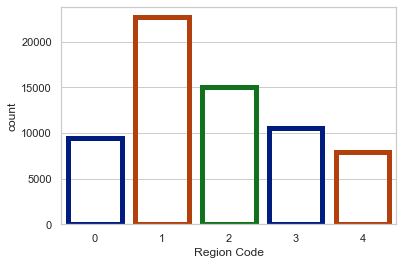

In [37]:
sns.countplot(x="Region Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))


<AxesSubplot:xlabel='State Code', ylabel='count'>

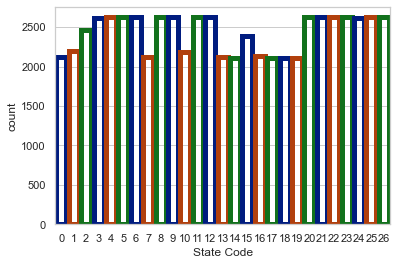

In [38]:
# Her for the state :
sns.countplot(x="State Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

<AxesSubplot:xlabel='Product Code', ylabel='count'>

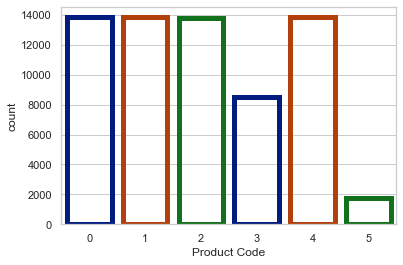

In [42]:
sns.countplot(x="Product Code", data=data,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))


<AxesSubplot:xlabel='Final Year', ylabel='count'>

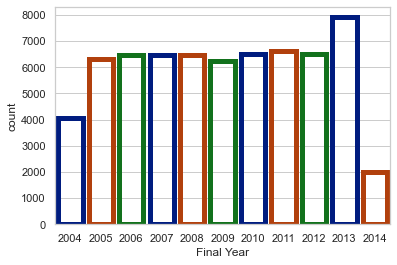

In [43]:
# And for the Year
sns.countplot(x = "Final Year", data = data, facecolor = (0,0,0,0), linewidth = 5, edgecolor = sns.color_palette('dark',3))

# Splitting Data 
now lets use determine X & y data, then use Sklearn, to split the data into Train & test


In [47]:
X = data.drop(['Mean Price'], axis=1, inplace=False)

X.head()

KeyError: "['Mean Price'] not found in axis"